<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/blob/master/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://becominghuman.ai/comprehending-k-means-and-knn-algorithms-c791be90883d

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


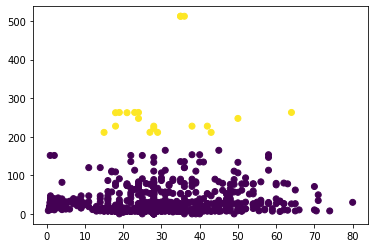

In [18]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
print(train.head())

train_simples = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp' , 'Parch', 'Pclass', 'Embarked', 'Sex', 'Survived'], axis=1)


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(train_simples)
train_no_null = imputer.transform(train_simples)
train_simples = pd.DataFrame(train_no_null, columns=train_simples.columns)
print(train_simples.head())

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
model.fit(train_simples)

pl.scatter(train_simples.Age, train_simples.Fare, c = model.labels_)

https://www.programcreek.com/python/example/103493/sklearn.cluster.AgglomerativeClustering

In [19]:
from sklearn.metrics import silhouette_score

silhouette_list = []
k_list = range(2, 10)

for p in k_list:
    clusterer = AgglomerativeClustering(n_clusters=p, linkage="average")
    clusterer.fit(train_simples)
    s = round(silhouette_score(train_simples, clusterer.labels_), 4)
    silhouette_list.append(s)
    print("silhouette_score =", s, " for k=", p)

key = silhouette_list.index(max(silhouette_list))
k = k_list.__getitem__(key)

print("Best=", max(silhouette_list), " for k=", k)

silhouette_score = 0.9075  for k= 2
silhouette_score = 0.7761  for k= 3
silhouette_score = 0.7082  for k= 4
silhouette_score = 0.6119  for k= 5
silhouette_score = 0.6021  for k= 6
silhouette_score = 0.6006  for k= 7
silhouette_score = 0.5914  for k= 8
silhouette_score = 0.5928  for k= 9
Best= 0.9075  for k= 2


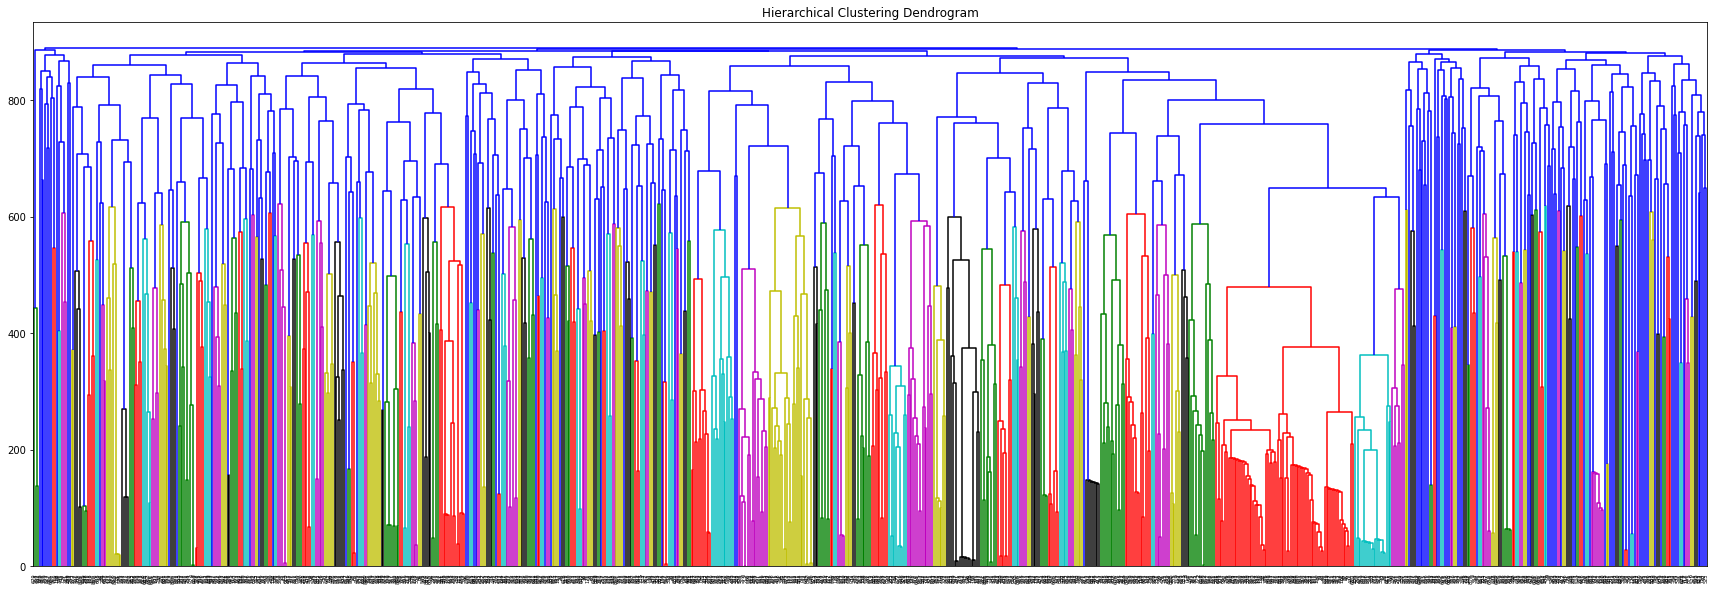

In [71]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(train_simples[:1000])
children = model.children_
#print(model.labels_)
#print(children)

distance = np.arange(children.shape[0])
#print(distance)
no_of_observations = np.arange(2, children.shape[0]+2)
#print(no_of_observations)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
#print(linkage_matrix)

plt.figure(figsize=(30, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

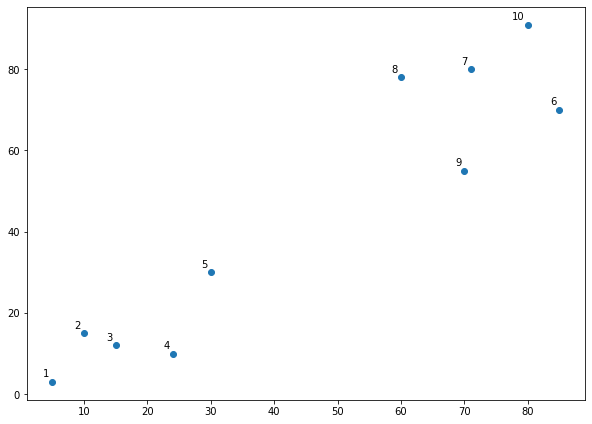

In [18]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

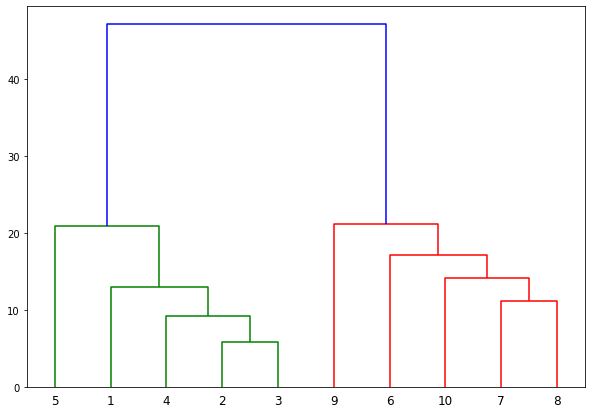

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

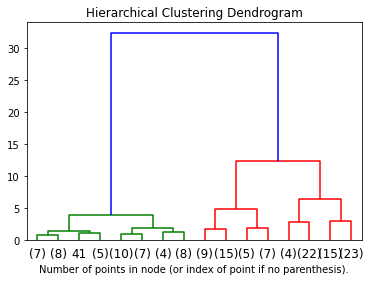

In [44]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

[[0.         1.         0.14142136 2.        ]
 [2.         3.         0.14142136 2.        ]
 [4.         5.         1.41421356 4.        ]]


{'color_list': ['g', 'r', 'b'],
 'dcoord': [[0.0, 0.14142135623730953, 0.14142135623730953, 0.0],
  [0.0, 0.14142135623730964, 0.14142135623730964, 0.0],
  [0.14142135623730953,
   1.4142135623730951,
   1.4142135623730951,
   0.14142135623730964]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3]}

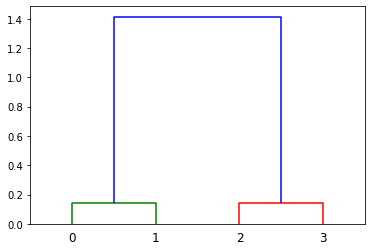

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
data = [[0., 0.], [0.1, -0.1], [1., 1.], [1.1, 1.1]]
Z = linkage(data)
print(Z)
dendrogram(Z)  

https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py

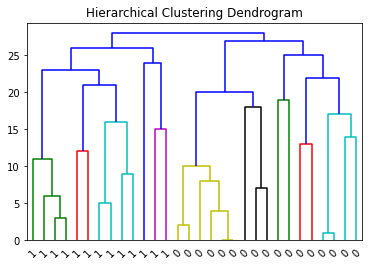

In [76]:

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:30]
model = AgglomerativeClustering(n_clusters=2)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

In [0]:
https://www.data-to-viz.com/graph/dendrogram.html